# Popular ML/NN/CNN/RNN Models code snippets  🤖📈

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
dataset = pd.read_csv('../input/breast-tumor-features/breast tumor.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("Dimensions: " + str(dataset.shape))

Dimensions: (683, 11)


In [22]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<a id="cell-basic_c_lr"></a>
### 3.2.1. Logistic regression

<img src="https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg" width="650" align="centr"/>

In [46]:
data = pd.read_csv('../input/white-wine-quality/winequality-white.csv', sep=';')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
# splitting the features(x) with the expected result(y) (quality of wine)
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [48]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y.reshape(-1,1)).toarray()

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=555)

print("Unscaled training data example:" + np.array2string(x_train[0], formatter={'float_kind':lambda x: "%.0f" % x}))

Unscaled training data example:[6 0 1 8 0 50 199 1 3 0 12]


In [50]:
from sklearn.preprocessing import StandardScaler
# saving unscaled versions for testing purposes if needed
unscaled_x_train = x_train
unscaled_x_test = x_test

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print("Scaled training data example:" + np.array2string(x_train[0], formatter={'float_kind':lambda x: "%.3f" % x}))

Scaled training data example:[-0.660 0.209 4.845 0.352 -0.524 0.869 1.418 -0.031 1.327 0.001 0.958]


<a id="cell-nn_seq"></a>
### 3.3.1 Neural Network: Sequential() keras

<img src="https://nickmccullum.com/images/python-deep-learning/how-do-neural-networks-really-work/completed-neural-network.png" width="650" align="centr"/>

This code snipet contains a simple sequential keras model. It can be used for simple models which only have one input and output. Otherwise you should use functional keras API.

Activation functions commonly used:

<img src="https://www.researchgate.net/profile/Aaron-Stebner-2/publication/341310767/figure/fig7/AS:890211844255749@1589254451431/Common-activation-functions-in-artificial-neural-networks-NNs-that-introduce.ppm" width="650" align="centr"/>


In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, BatchNormalization

BATCH_SIZE = 32
VAL_SPLIT = 0.1
EPOCH_NUM = 15
LEARNING_RATE = 0.0002

model = Sequential()

model.add(Dense(units = 32, activation = 'relu', input_dim = 11))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=7,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])

fitted_model= model.fit(x_train, y_train, validation_split= VAL_SPLIT, epochs= EPOCH_NUM, batch_size= BATCH_SIZE)

2022-06-27 14:18:55.877122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 14:18:55.885922: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 14:18:55.887148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 14:18:55.890117: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/15
111/111 [==============================] - 3s 6ms/step - loss: 1.9394 - accuracy: 0.2535 - val_loss: 1.7862 - val_accuracy: 0.4337
Epoch 2/15
111/111 [==============================] - 1s 5ms/step - loss: 1.5426 - accuracy: 0.4299 - val_loss: 1.5420 - val_accuracy: 0.4566
Epoch 3/15
111/111 [==============================] - 1s 5ms/step - loss: 1.3866 - accuracy: 0.4691 - val_loss: 1.3335 - val_accuracy: 0.4796
Epoch 4/15
111/111 [==============================] - 1s 5ms/step - loss: 1.3344 - accuracy: 0.4677 - val_loss: 1.2244 - val_accuracy: 0.4898
Epoch 5/15
111/111 [==============================] - 1s 5ms/step - loss: 1.2706 - accuracy: 0.4796 - val_loss: 1.1660 - val_accuracy: 0.4974
Epoch 6/15
111/111 [==============================] - 1s 5ms/step - loss: 1.2550 - accuracy: 0.4833 - val_loss: 1.1314 - val_accuracy: 0.5230
Epoch 7/15
111/111 [==============================] - 0s 4ms/step - loss: 1.2295 - accuracy: 0.4909 - val_loss: 1.1079 - val_accuracy: 0.5306
Epoch 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

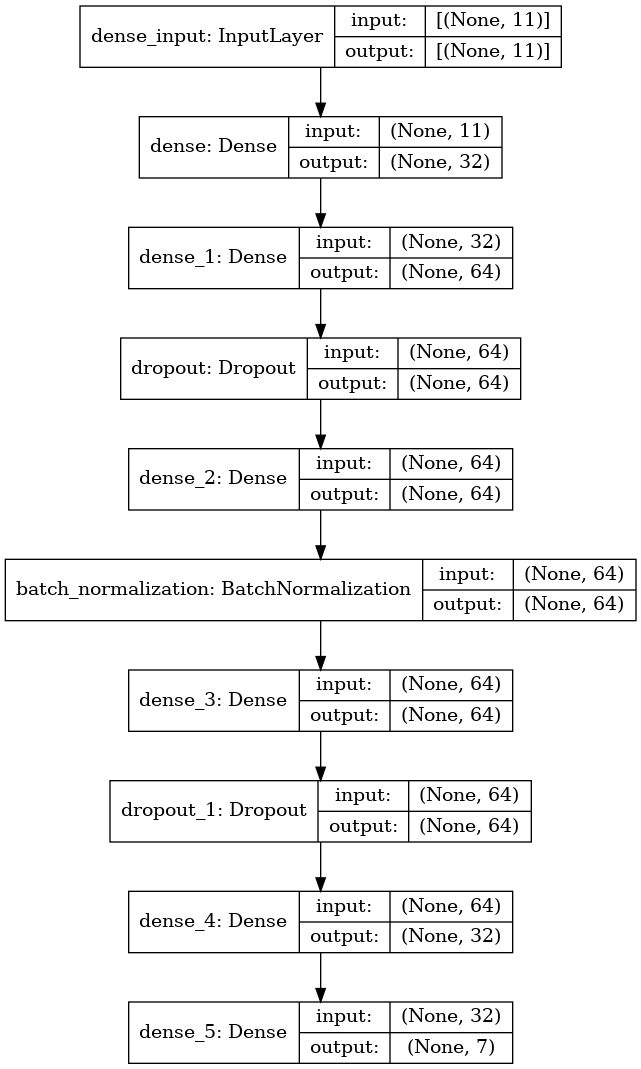

In [52]:
model.summary()
tf.keras.utils.plot_model(model,  show_shapes=True,expand_nested=True)

Analysis on Training the model:

If your training (blue line) starts to heavily outperform the validation (yellow line), then you are overfitting. Solutions against this:

* Change learning rate higher/lower OR change it to a decaying learning rate
* Regularize your model by using BatchNormalization and or Dropout
* Data Engineer your dataset, to become more robust (example: binning)
* Make the neural network smaller

Deciding how big your neural network should be:

* Make your neural network bigger as long as it does not overfit the data on Val/Test-dataset
* The more data you have, the bigger your model can become without overfitting
* Don't make too big of a NN if you don't have a lot of data. Example: having 1k dataset but 1million parameters in the model will almost always create a bad model. But it is normal that you have more parameters than data samples, just don't go overboard and start thinking about regularization if it does get out of hand. Regularization helps a lot with bigger models.

In [95]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

# importing the data

image_path = ["../input/lyft-udacity-challenge/"+"data"+i+"/"+"data"+i+"/CameraRGB/" for i in ['A', 'B', 'C', 'D', 'E']]
mask_path = ["../input/lyft-udacity-challenge/"+"data"+i+"/"+"data"+i+"/CameraSeg/" for i in ['A', 'B', 'C', 'D', 'E']]

def list_image_paths(directory_paths):
    image_paths = []
    for directory in range(len(directory_paths)):
        image_filenames = os.listdir(directory_paths[directory])
        for image_filename in image_filenames:
            image_paths.append(directory_paths[directory] + image_filename)
    return image_paths

image_paths = list_image_paths(image_path) 
mask_paths = list_image_paths(mask_path)
number_of_images, number_of_masks = len(image_paths), len(mask_paths)
print(f"1. There are {number_of_images} images and {number_of_masks} masks in our dataset")

# First split the image paths into training and validation sets
train_image_paths, val_image_paths, train_mask_paths, val_mask_paths = train_test_split(image_paths, mask_paths, train_size=0.8, random_state=0)
# Keep part of the validation set as test set
validation_image_paths, test_image_paths, validation_mask_paths, test_mask_paths = train_test_split(val_image_paths, val_mask_paths, train_size = 0.80, random_state=0)

def read_image(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (256, 256), method='nearest')

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    mask = tf.image.resize(mask, (256, 256), method='nearest')
    
    return image, mask

def data_generator(image_paths, mask_paths, buffer_size, batch_size):   
    image_list = tf.constant(image_paths) 
    mask_list = tf.constant(mask_paths)
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(read_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.cache().shuffle(buffer_size).batch(batch_size)
    
    return dataset

batch_size = 32
buffer_size = 500

train_dataset = data_generator(train_image_paths, train_mask_paths, buffer_size, batch_size)
validation_dataset = data_generator(validation_image_paths, validation_mask_paths, buffer_size, batch_size)
test_dataset = data_generator(test_image_paths, test_mask_paths, buffer_size, batch_size)

1. There are 5000 images and 5000 masks in our dataset


In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Dense, BatchNormalization, Conv2D, Flatten, MaxPool2D, Activation, Add, GlobalAveragePooling2D, Conv2DTranspose

def conv_block(inputs=None, filters=32, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block
    
    Arguments:
        inputs -- Input tensor
        n_filters -- Number of filters for the convolutional layers
        dropout_prob -- Dropout probability
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns: 
        next_layer, skip_connection --  Next layer and skip connection outputs
    """

    conv = Conv2D(filters, # Number of filters
                  3,# Kernel size   
                  padding='same',
                  kernel_initializer= 'he_normal')(inputs)
    conv = BatchNormalization()(conv)
    conv = Activation("relu")(conv)
    
    conv = Conv2D(filters, # Number of filters
                  3,# Kernel size   
                  padding='same',
                  kernel_initializer= 'he_normal')(conv)
    conv = BatchNormalization()(conv)
    conv = Activation("relu")(conv)
    
    # if dropout_prob > 0 add a dropout layer, with the variable dropout_prob as parameter
    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
        
    # if max_pooling is True add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        next_layer = MaxPool2D(2,strides=2)(conv)  
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

def upsampling_block(expansive_input, contractive_input, filters=32):
    """
    Convolutional upsampling block
    
    Arguments:
        expansive_input -- Input tensor from previous layer
        contractive_input -- Input tensor from previous skip layer
        n_filters -- Number of filters for the convolutional layers
    Returns: 
        conv -- Tensor output
    """
    
    up = Conv2DTranspose(
                 filters,    # number of filters
                 3,# Kernel size
                 strides=2,
                 padding='same')(expansive_input)
    
    # Merge the previous output and the contractive_input
    merge = layers.Concatenate()([up, contractive_input])
    
    conv = Conv2D(filters, # Number of filters
                  3,# Kernel size   
                  padding='same',
                  kernel_initializer= 'he_normal')(merge)
    
    conv = BatchNormalization()(merge)
    conv = Activation("relu")(conv)
    
    conv = Conv2D(filters, # Number of filters
                  3,# Kernel size   
                  padding='same',
                  kernel_initializer= 'he_normal')(conv)
    conv = BatchNormalization()(merge)
    conv = Activation("relu")(conv)
    
    return conv

def unet_model(input_size, filters=32, n_classes=23):
    """
    Unet model
    
    Arguments:
        input_size -- Input shape 
        n_filters -- Number of filters for the convolutional layers
        n_classes -- Number of output classes
    Returns: 
        model -- tf.keras.Model
    """
    inputs = tf.keras.Input(input_size)
    
    # Contracting Path (encoding)
    cblock1 = conv_block(inputs=inputs, filters=filters, max_pooling=True)
    # Chain the first element of the output of each block to be the input of the next conv_block. 
    # Double the number of filters at each new step
    
    cblock2 = conv_block(inputs=cblock1[0], filters=filters*2, max_pooling=True)
    cblock3 = conv_block(inputs=cblock2[0], filters=filters*4)

    cblock4 = conv_block(inputs=cblock3[0], filters=filters*8, max_pooling=True)

    cblock5 = conv_block(inputs=cblock4[0], filters=filters*16, dropout_prob=0.25, max_pooling=False) 
    
    # Expanding Path (decoding)
    # From here,at each step, use half the number of filters of the previous block 
    ublock6 = upsampling_block(cblock5[0], cblock4[1], filters*8)
    # Chain the output of the previous block as expansive_input and the corresponding contractive block output.
    # Note that you must use the second element of the contractive block i.e before the maxpooling layer. 
    
    ublock7 = upsampling_block(ublock6, cblock3[1], filters*4)
    ublock8 = upsampling_block(ublock7, cblock2[1], filters*2)
    ublock9 = upsampling_block(ublock8, cblock1[1], filters)

    conv10 = Conv2D(filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    output = Conv2D(n_classes, kernel_size = (1,1), activation='softmax', padding='same')(conv10)
    
    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

img_height = 256
img_width = 256
num_channels = 3
filters = 32
n_classes = 13
LEARNING_RATE = 0.01

model = unet_model((img_height, img_width, num_channels), filters=32, n_classes=23)
model.compile(optimizer = tf.optimizers.Adam(LEARNING_RATE), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 256, 256, 32) 896         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 256, 256, 32) 128         conv2d_13[0][0]                  
__________________________________________________________________________________________________
activation_14 (Activation)      (None, 256, 256, 32) 0           batch_normalization_15[0][0]     
____________________________________________________________________________________________

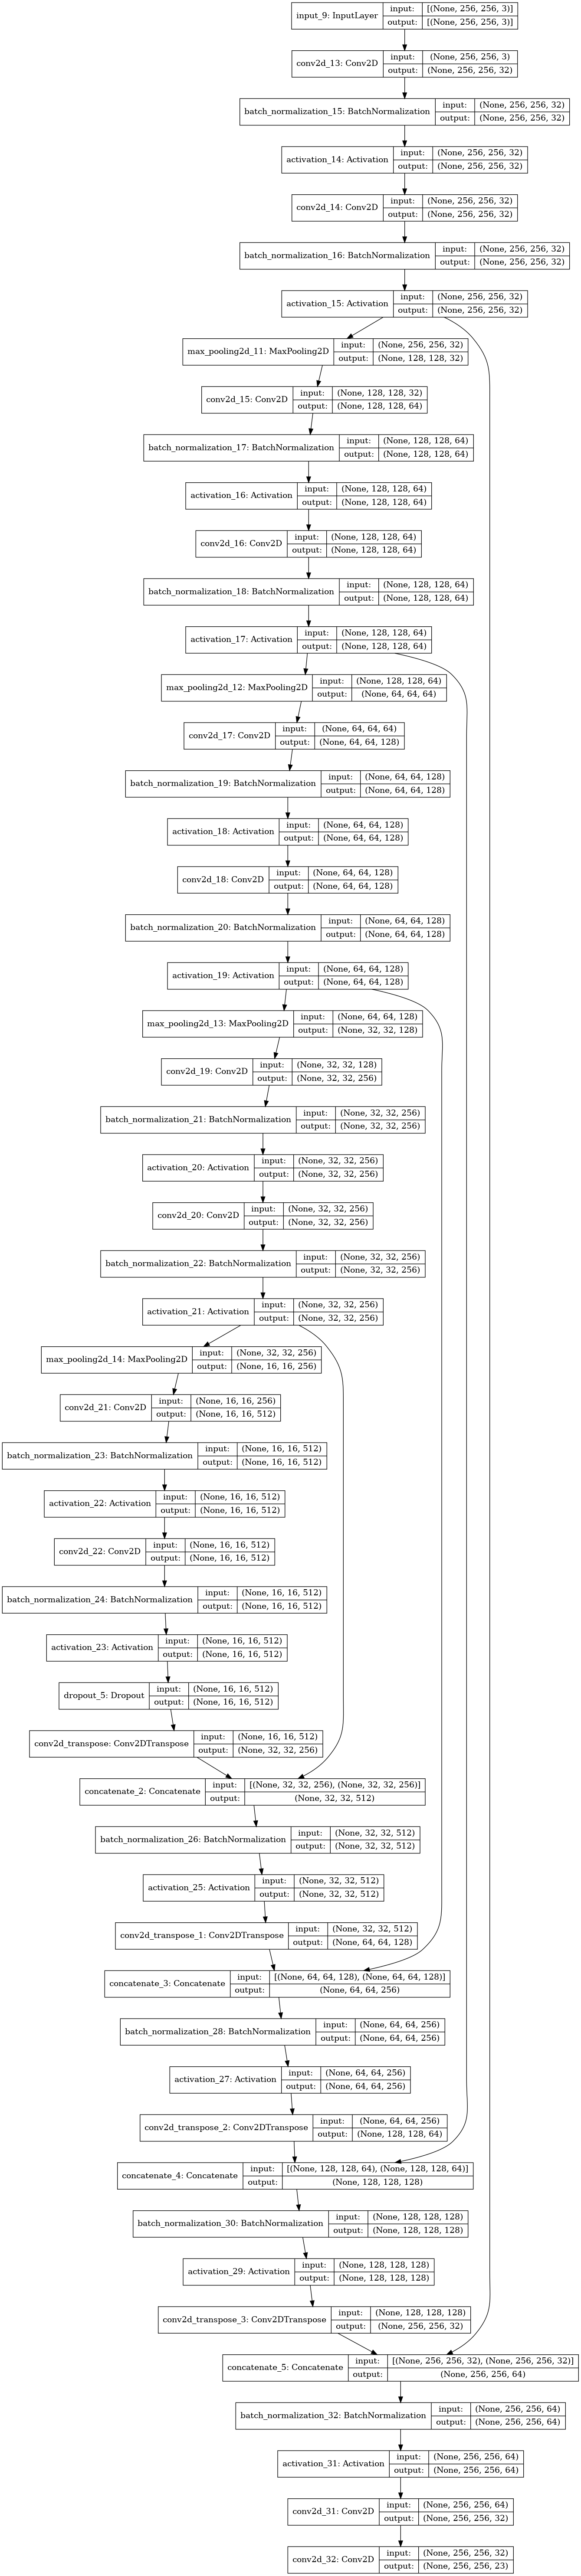

In [97]:
model.summary()
tf.keras.utils.plot_model(model,  show_shapes=True,expand_nested=True)

In [101]:
!pip install yfinance
import yfinance as yf

  Preparing metadata (setup.py) ... - done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=367dc9ad5ba92bcf275a83c0ba00be8f0c7e3d391891c4d09982ed765da4df64
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

WINDOW_SIZE = 40

aapl = yf.Ticker("AAPL")
X = aapl.history("max").loc[:,['Close']]
y = X[WINDOW_SIZE:]

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.transform(y)

# putting WINDOW_SIZE amount of datapoints in a list which rolls over throughout the data. This is used as input for the neural network
X_df = []
for i in range(WINDOW_SIZE, len(X_scaled)):
    X_df.append(X_scaled[i-WINDOW_SIZE:i])

print(np.shape(X_df))
X_train, X_test, y_train, y_test = train_test_split(X_df, y_scaled, test_size = 0.2, random_state = 0, shuffle=False)

(10433, 40, 1)


<a id="cell-rnn_lstm"></a>
## 3.5.1 Long short-term memory (LSTM)

<img src="https://miro.medium.com/max/674/1*jikKbzFXCq-IYnFZankIMg.png" width="650" align="centr"/>

In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Dense, BatchNormalization, LSTM, Activation, Reshape

BATCH_SIZE = 32
VAL_SPLIT = 0.1
EPOCH_NUM = 5
LEARNING_RATE = 0.01
WINDOW_SIZE = 40

# Defining the input size
x_inputs = tf.keras.Input((WINDOW_SIZE, 1))

# If we are working with text, we might use Bidirectional LSTM
x = LSTM(units = 40, return_sequences=False)(x_inputs)
x = Dense(units = 16, activation = 'relu')(x)

output = Dense(units = 1, activation = 'linear')(x)

model = tf.keras.Model(inputs=x_inputs, outputs=output)
model.compile(optimizer=tf.optimizers.Adam(LEARNING_RATE), loss='mse',metrics=['mse'])

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 40, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                656       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 7,393
Trainable params: 7,393
Non-trainable params: 0
_________________________________________________________________


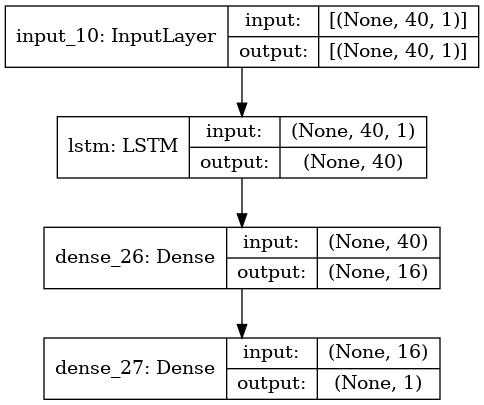

In [104]:
model.summary()
tf.keras.utils.plot_model(model,  show_shapes=True,expand_nested=True)

In [105]:
with tf.device('/gpu:0'):# if no GPU is found it will run with the CPU
    history = model.fit(x = np.array(X_train), y = np.array(y_train), validation_split = VAL_SPLIT, epochs = EPOCH_NUM, batch_size = BATCH_SIZE)

Epoch 1/5
235/235 [==============================] - 4s 10ms/step - loss: 3.0609e-05 - mse: 3.0609e-05 - val_loss: 7.5407e-06 - val_mse: 7.5407e-06
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 4.4878e-07 - mse: 4.4878e-07 - val_loss: 6.7999e-06 - val_mse: 6.7999e-06
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 5.3549e-07 - mse: 5.3549e-07 - val_loss: 6.3861e-06 - val_mse: 6.3861e-06
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 6.8286e-07 - mse: 6.8286e-07 - val_loss: 1.8284e-05 - val_mse: 1.8284e-05
Epoch 5/5
235/235 [==============================] - 1s 6ms/step - loss: 4.8680e-07 - mse: 4.8680e-07 - val_loss: 5.0243e-06 - val_mse: 5.0243e-06


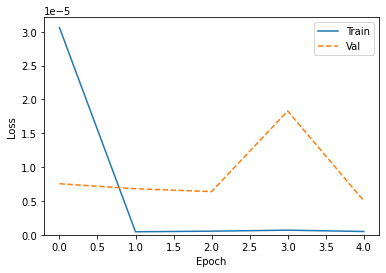

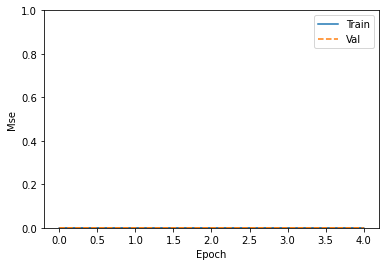

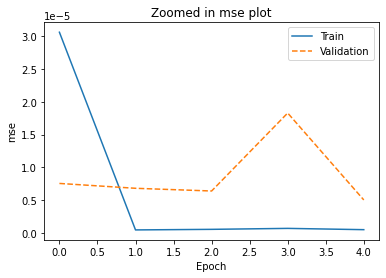

In [106]:
def plot_metrics(history):
  metrics = ['loss', 'mse']
  for n, metric in enumerate(metrics):
    try:
      name = metric.replace("_"," ").capitalize()
      plt.plot(history.epoch, history.history[metric], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])
      plt.legend()
      plt.show()  
    except:
      pass
plot_metrics(model.history)

plt.title(label='Zoomed in mse plot')
plt.plot(history.history["mse"],label='Train')
plt.plot(history.history["val_mse"],linestyle="--",label='Validation')
plt.legend()
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend()
plt.show()

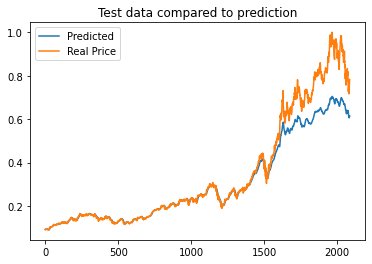

In [107]:
pred = model.predict(np.array(X_test))

plt.title("Test data compared to prediction")
plt.plot(range(len(pred)), pred, label='Predicted')
plt.plot(range(len(y_test)), y_test, label='Real Price')
plt.legend()
plt.show()